# Sentiment Analysis

Sentiment analysis the process of computationally analyzing a person's thoughts, feelings, or attitudes on products, services, topics, events, etc (WorldClass FTE). Analyzing public opinions plays a crucial part in marketing/business and politics. Businesses use it to understand customers' feelings towards a product or brand and use it to understand how people respond to their marketing campaigns (Twitter sentiment analysis using python, 2017). In politics, sentiment analysis is used to keep track of political views and is used to detect the consistency/inconsistency between the statements or actions at the government level (Twitter sentiment analysis using python, 2017). Of course, there are many more applications of sentiment analysis. For example, sentiment analysis can be used to fight infectious disease, promote social inclusion, and more (Thompson, 2018). 

However, the primary focus of sentiment analysis is to analyze information from the interned (tweets, blogs, social media, reviews, and comments) (WorldClass FTE). For this assignment, we will choose a social media platform to quantify opinions regarding customer satisfaction and then analyze the data. 

## Load Amazon Reviews Data

The dataset we will be using contains product reviews from Amazon. Specifically, we will be using product reviews for "Sports and Outdoors" products (Amazon review data, n.d.). The information in this dataset includes the reviewer ID, ASIN (Amazon Standard Identification Number), reviewer name, helpfulness, the review text, the overall rating given by the reviewer, the summary of the review text, and the review time. 

In [1]:
import pandas as pd
reviews_df = pd.read_json("C:/Users/07hoc/Downloads/MSDS 682 Downloads/Week 7/reviews_Sports_and_Outdoors_5.json.gz", lines = True)

To read this data file using `Pandas`, we will use the `read_json()` function since our data is in `json` format (Read_json, n.d.). We also need to use the argument `lines = True` so we can read the file as a `json` object per line (Read_json, n.d.).

In [2]:
reviews_df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AIXZKN4ACSKI,1881509818,David Briner,"[0, 0]",This came in on time and I am veru happy with ...,5,Woks very good,1390694400,"01 26, 2014"
1,A1L5P841VIO02V,1881509818,Jason A. Kramer,"[1, 1]",I had a factory Glock tool that I was using fo...,5,Works as well as the factory tool,1328140800,"02 2, 2012"
2,AB2W04NI4OEAD,1881509818,J. Fernald,"[2, 2]",If you don't have a 3/32 punch or would like t...,4,"It's a punch, that's all.",1330387200,"02 28, 2012"
3,A148SVSWKTJKU6,1881509818,"Jusitn A. Watts ""Maverick9614""","[0, 0]",This works no better than any 3/32 punch you w...,4,It's a punch with a Glock logo.,1328400000,"02 5, 2012"
4,AAAWJ6LW9WMOO,1881509818,Material Man,"[0, 0]",I purchased this thinking maybe I need a speci...,4,"Ok,tool does what a regular punch does.",1366675200,"04 23, 2013"


In [3]:
reviews_df.shape

(296337, 9)

We will convert our `reviewTime` column to datetime format using the `to_datetime()` function (To_datetime, n.d.).

In [4]:
reviews_df['reviewTime'] = pd.to_datetime(reviews_df['reviewTime'])

In [5]:
reviews_df['reviewTime'] 

0        2014-01-26
1        2012-02-02
2        2012-02-28
3        2012-02-05
4        2013-04-23
            ...    
296332   2014-07-11
296333   2014-07-18
296334   2014-07-21
296335   2014-07-21
296336   2014-07-15
Name: reviewTime, Length: 296337, dtype: datetime64[ns]

To make our customer review columns easily accessible in the future (if necessary), we will save the `reviewText` and `summary` columns in the variables `review_text` and `review_summary`, respectively. 

In [6]:
review_text = reviews_df['reviewText']

In [7]:
review_text[0]

'This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy'

In [8]:
review_summary = reviews_df['summary']

In [9]:
review_summary[0]

'Woks very good'

## `TextBlob`

One method to perform sentiment analysis is to use the module `TextBlob`. `TextBlob` is an NLP library for python and is built upon `NLTK`. To use `TextBlob` for sentiment analysis, we need to pass our words/sentences/reviews through `TextBlob`. Then, we can apply the various functions, like the `sentiment` function which returns two properties: polarity and subjectivity. Polarity is a float value in the range of -1.0 to 1.0, where are value of 1.0 means a positive statement and -1.0 means it is a negative statement (Jain, 2018). Subjectivity refers to whether the statement expresses personal feelings, views, beliefs, opinions, allegations, beliefs, speculations, etc. or not (Vaish, 2018). On the other hand, an objective sentence is a factual sentence. Thus, subjectivity is a float value in the range 0.0 to 1.0 where 0.0 is very objective and 1.0 is very subjective (Vaish, 2018).

### Sentiment and Sentiment Assessments

First, we need to install `TextBlob` in our Anaconda prompt by using the command `conda install -c conda-forge textblob` (Textblob: Anaconda cloud, n.d.). Then, we can import the module and apply `TextBlob` to our `review_text`. With our `TextBlob` text, we can apply the functions `sentiment`, `correct()`, and `sentiment_assessments`.

In [10]:
import textblob

In [11]:
tb_0 = textblob.TextBlob(review_text[0])

In [12]:
tb_0

TextBlob("This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy")

In [13]:
tb_0.sentiment

Sentiment(polarity=0.6816666666666666, subjectivity=1.0)

The sentiment output for our first review indicates that the review is a positive review and is subjective. For the future, an interesting feature that `TextBlob` offers is a spelling correction function. The `correct()` function allows us to "spell check" our sentences (Jain, 2018). 

In [14]:
tb_0.correct()

TextBlob("His came in on time and I am very happy with it, I have used it already and it makes taking out the pins in my clock 32 very easy")

In [80]:
tb_0.correct().sentiment

Sentiment(polarity=0.7816666666666667, subjectivity=1.0)

Notice, that by using `correct()` function, the function corrected words that `TextBlob` thought was spelled incorrectly and the sentiment score changed.  

Now, we can use the `sentiment_assessments` function to determine polarity, subjectivity, and assessments. The assessments is a list of polarity and subjectivity scores for the assessed tokens (API Reference — TextBlob, n.d.). Further, the assessments are the pieces of text that `TextBlob` is using to assess the sentence (George, n.d.). 

In [15]:
tb_0.sentiment_assessments

Sentiment(polarity=0.6816666666666666, subjectivity=1.0, assessments=[(['happy'], 0.8, 1.0, None), (['very', 'easy'], 0.5633333333333334, 1.0, None)])

The assessments output above suggests that the terms "happy", "very", and "easy" were used to determine polarity and subjectivity. Now, we can use a loop to get the sentiment assessments for all of our reviews. 

In [16]:
from tqdm import tqdm_notebook as tqdm

In [17]:
#tb_sentiment = []
tb_sentiment_assessments = {}
pbar = tqdm(total = 100)

for r in range(0, len(review_text)):
    #tb_sentiment.append(textblob.TextBlob(review_text[r]).sentiment)
    tb_sentiment_assessments[review_text[r]]= textblob.TextBlob(review_text[r]).sentiment_assessments
    pbar.update(1)

pbar.close()

In [82]:
print('There are {} reviews that TextBlob was unable to process.'.format(len(review_text)-len(tb_sentiment_assessments)))

There are 213 reviews that TextBlob was unable to process.


We can see that there were reviews that were not analyzed. To make it easier to access the items in our dictionary, we can use a combination of the `list()` function and the `.keys()` and `.values()` functions (Get the first key in dictionary, n.d.). A list allows us to easily extract items. We will iterate over each key and value in our dictionary and then convert the keys and values to a list with the `list()` function. From here, we can then access the reviews, polarity, subjectivity, and assessments individually and store them in their own lists. Finally, we can use the `zip()` function to combine the lists to a pandas dataframe (Create a pandas dataframe from lists, 2018).

In [19]:
list(tb_sentiment_assessments.keys())[0], list(tb_sentiment_assessments.values())[0]

('This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy',
 Sentiment(polarity=0.6816666666666666, subjectivity=1.0, assessments=[(['happy'], 0.8, 1.0, None), (['very', 'easy'], 0.5633333333333334, 1.0, None)]))

In [20]:
x = list(tb_sentiment_assessments.values())[0] #list format for first value

In [21]:
x

Sentiment(polarity=0.6816666666666666, subjectivity=1.0, assessments=[(['happy'], 0.8, 1.0, None), (['very', 'easy'], 0.5633333333333334, 1.0, None)])

In [22]:
x[0] #polarity

0.6816666666666666

In [23]:
x[1] #subjectivity

1.0

In [24]:
x[2] #assessments

[(['happy'], 0.8, 1.0, None),
 (['very', 'easy'], 0.5633333333333334, 1.0, None)]

In [25]:
keys = []
polarity = []
subjectivity = []
assessments = []

for key, value in tb_sentiment_assessments.items():
    keys.append(key)
    value_list = list(value)
    polarity.append(value_list[0])
    subjectivity.append(value_list[1])
    assessments.append(value_list[2])


In [26]:
keys[0], polarity[0], subjectivity[0], assessments[0]

('This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy',
 0.6816666666666666,
 1.0,
 [(['happy'], 0.8, 1.0, None),
  (['very', 'easy'], 0.5633333333333334, 1.0, None)])

In [27]:
assessments_df = pd.DataFrame(zip(keys, polarity, subjectivity, assessments), columns=['Reviews', 'Polarity', 'Subjectivity','Assessments'])

In [28]:
assessments_df.head(5)

,Reviews,Polarity,Subjectivity,Assessments
0,This came in on time and I am veru happy with ...,0.681667,1.000000,"[([happy], 0.8, 1.0, None), ([very, easy], 0.5..."
1,I had a factory Glock tool that I was using fo...,0.300000,0.497222,"[([prior], 0.0, 0.0, None), ([sure], 0.5, 0.88..."
2,If you don't have a 3/32 punch or would like t...,0.366667,0.466667,"[([okay], 0.5, 0.5, None), ([handy], 0.6, 0.9,..."
3,This works no better than any 3/32 punch you w...,0.150000,0.335385,"[([no, better], -0.25, 0.5, None), ([actually]..."
4,I purchased this thinking maybe I need a speci...,-0.129932,0.543812,"[([special], 0.35714285714285715, 0.5714285714..."


Now that we have our sentiment assessments in a dataframe, we can analyze our data. First, we look at distribution of our `Polarity` column. This will allow us to determine the most frequent group of polarity scores. To visualize this information, we will use the `seaborn` module to create a `countplot`. A countplot shows the counts of observations in each category using bars (Seaborn countplot, n.d.). 

In [29]:
assessments_df['Polarity'].round(1).value_counts()

 0.2    71142
 0.1    55940
 0.3    49970
 0.4    34182
-0.0    31101
 0.5    17996
 0.6    10222
-0.1     9271
 0.7     4350
-0.2     4105
 0.8     3505
 1.0     1357
-0.3     1179
 0.9      706
-0.4      495
-0.5      281
-0.6      133
-0.8       80
-0.7       64
-1.0       39
-0.9        6
Name: Polarity, dtype: int64

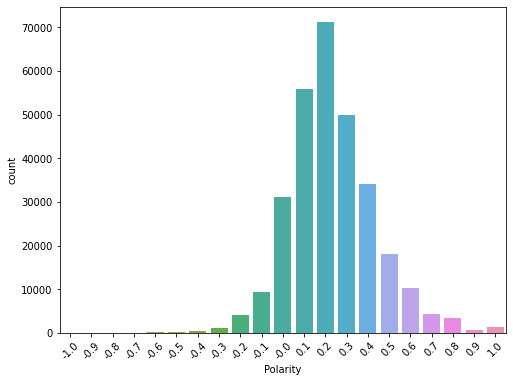

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.xticks(rotation=45) #(How to rotate axis labels in seaborn and matplotlib, n.d.)

sns.countplot(x = assessments_df['Polarity'].round(1), data = assessments_df)

Our graph above indicates that most of our polarity scores belong to the `0.20` group. We can also see that the majority of polarity scores are positive. Now, we can view the assessments for the top polarity scores. This allows us to determine the words that are used in determining the polarity scores. 

In [31]:
top_polar = assessments_df.sort_values(by = 'Polarity', ascending=False)
top_polar['Assessments'].iloc[:20]

189304                      [([great, !], 1.0, 0.75, None)]
98482                         [([awesome], 1.0, 1.0, None)]
163497                [([great, !, !, !], 1.0, 0.75, None)]
132012                           [([best], 1.0, 0.3, None)]
248904                        [([perfect], 1.0, 1.0, None)]
248922    [([excellent], 1.0, 1.0, None), ([excellent], ...
191106    [([best, !, !, !], 1.0, 0.3, None), ([nice, !,...
191101                           [([best], 1.0, 0.3, None)]
89392                         [([perfect], 1.0, 1.0, None)]
89399          [([perfectly, very, happy], 1.0, 1.0, None)]
233076                    [([wonderfully], 1.0, 1.0, None)]
191099    [([good, !, !, !, !], 1.0, 0.6000000000000001,...
14061                     [([very, happy], 1.0, 1.0, None)]
105133                        [([perfect], 1.0, 1.0, None)]
163646                      [([perfectly], 1.0, 1.0, None)]
163652                        [([best, !], 1.0, 0.3, None)]
163676            [([fine, !, !, !, !, !

We can see that the terms "great", "awesome", "perfect", "best", and "excellent" are used in order to determine polarity. These, as we know, are all positive terms and is the reason the polarity scores for these reviews were close, or equal to, 1.0. Now, let's look at the terms used to determine the polarity scores for the negative reviews. 

In [32]:
low_polar = assessments_df.sort_values(by = 'Polarity', ascending=True)
low_polar['Assessments'].iloc[:20]

41344                        [([hate, !], -1.0, 0.9, None)]
26524                       [([terrible], -1.0, 1.0, None)]
80379                        [([hate, !], -1.0, 0.9, None)]
210029              [([base, !, !, !, !], -1.0, 1.0, None)]
102077                      [([horrible], -1.0, 1.0, None)]
1893                         [([evil, !], -1.0, 1.0, None)]
114499       [([wrong, !, !, !, !, !, !], -1.0, 0.9, None)]
80141     [([sick, !, !, !, !, !], -1.0, 0.8571428571428...
193903                  [([crap, !], -1.0, 0.8, profanity)]
266539                         [([awful], -1.0, 1.0, None)]
101748                      [([terrible], -1.0, 1.0, None)]
190045    [([ruthless], -1.0, 1.0, None), ([evil], -1.0,...
112808                         [([worst], -1.0, 1.0, None)]
36248                       [([terrible], -1.0, 1.0, None)]
101559                  [([worthless, !], -1.0, 0.9, None)]
246349    [([really, bad, !, !, !], -1.0, 0.666666666666...
22168                          [([nasty]

We can see the terms "hate", "terrible", "crap", "wrong", "awful", "terrible", and "bad", which we all know as negative terms. Particularly, "crap" was assessed as "profanity". Now, let's look at the distribution of our `Subjectivity` column.

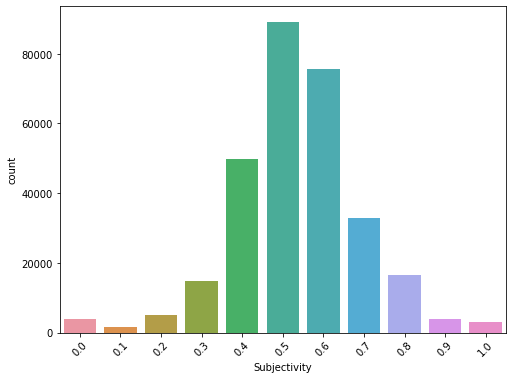

In [33]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)

sns.countplot(x = assessments_df['Subjectivity'].round(1), data = assessments_df)

The majority of our reviews are subjective rather than objective. 

### Naive Bayes Analyzer

The `textblob.sentiments` module also contains two sentiment analysis implementations: `PatternAnalyzer` and `NaiveBayesAnalyzer`. We will use the `NaiveBayesAnalyzer`, which is an `NLTK` classifier trained on a movie review corpus, to analyze our reviews (API Reference — TextBlob, n.d.). The `NaiveBayesAnalyzer` returns a tuple of the form  `Sentiment(classification, p_pos, p_neg)` (API Reference — TextBlob, n.d.). 

In [34]:
nb = textblob.en.sentiments.NaiveBayesAnalyzer()

In [35]:
review_text[0]

'This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy'

In [36]:
nb.analyze(review_text[0])

Sentiment(classification='pos', p_pos=0.6912353382888043, p_neg=0.3087646617111954)

Now, we can apply our `nb` function to our `review_text` and store the information in a dictionary.

In [37]:
nb_analyzer = {}
pbar = tqdm(total = 100)

for r in range(0, len(review_text)):
    nb_analyzer[review_text[r]]= nb.analyze(review_text[r])
    pbar.update(1)

pbar.close()

In [38]:
len(nb_analyzer), len(review_text)

(296124, 296337)

Similarly to how we handled the `tb_sentiment_assessments` dictionary, we will convert the contents of the `nb_analyzer` dictionary to a list so we can easily extract the information. 

In [39]:
list(nb_analyzer.keys())[0], list(nb_analyzer.values())[0]

('This came in on time and I am veru happy with it, I haved used it already and it makes taking out the pins in my glock 32 very easy',
 Sentiment(classification='pos', p_pos=0.6912353382888043, p_neg=0.3087646617111954))

In [40]:
list(nb_analyzer.values())[0]

Sentiment(classification='pos', p_pos=0.6912353382888043, p_neg=0.3087646617111954)

In [41]:
y = list(nb_analyzer.values())[0]

In [42]:
y[0]

'pos'

In [43]:
y[1]

0.6912353382888043

In [44]:
y[2]

0.3087646617111954

Converting our keys and values in the `nb_analyzer` dictionary to a list format will allow us to access the `classification`, `p_pos`, and `p_neg` scores separately and store them in their own lists. Then, we can combine the lists using the `zip` function to store them in a pandas dataframe.

In [45]:
keys = []
classification = []
p_pos = []
p_neg = []

for key, value in nb_analyzer.items():
    keys.append(key)
    value_list = list(value)
    classification.append(value_list[0])
    p_pos.append(value_list[1])
    p_neg.append(value_list[2])


In [46]:
len(keys), len(classification), len(p_pos), len(p_neg) #confirm the the length of lists are the same

(296124, 296124, 296124, 296124)

In [47]:
sentiment_df = pd.DataFrame(zip(keys, classification, p_pos, p_neg), columns=['Reviews', 'Classification', 'P_POSITIVE','P_NEGATIVE'])

In [48]:
sentiment_df.head()

,Reviews,Classification,P_POSITIVE,P_NEGATIVE
0,This came in on time and I am veru happy with ...,pos,0.691235,0.308765
1,I had a factory Glock tool that I was using fo...,pos,0.695862,0.304138
2,If you don't have a 3/32 punch or would like t...,neg,0.297719,0.702281
3,This works no better than any 3/32 punch you w...,pos,0.573462,0.426538
4,I purchased this thinking maybe I need a speci...,pos,0.951832,0.048168


Now that we have our Naive Bayes Analyzer scores in a dataframe, let's look at the distribution of the positive and negative scores. 

In [49]:
sentiment_df.dtypes

Reviews            object
Classification     object
P_POSITIVE        float64
P_NEGATIVE        float64
dtype: object

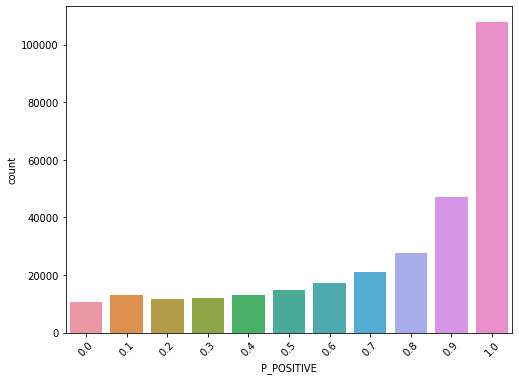

In [50]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)

sns.countplot(x = sentiment_df['P_POSITIVE'].round(1), data = sentiment_df)

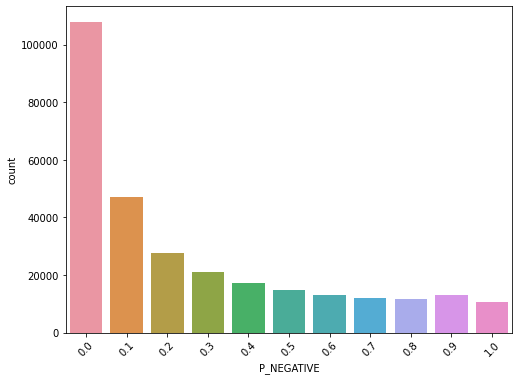

In [51]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=45)

sns.countplot(x = sentiment_df['P_NEGATIVE'].round(1), data = sentiment_df)

Next, let's look at the average scores of our positive and negative reviews.

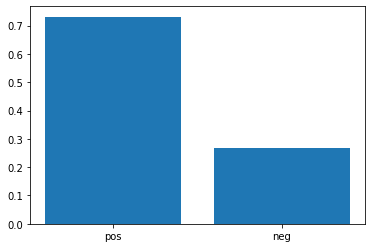

In [52]:
import matplotlib.pyplot as plt
fig = plt.figure()

classes = ['pos', 'neg']
mean = [sentiment_df['P_POSITIVE'].mean(), sentiment_df['P_NEGATIVE'].mean()]

plt.bar(x = classes, height = mean) #(Matplotlib. Pyplot. Bar, n.d.)
plt.show()

In [88]:
mean = [sentiment_df['P_POSITIVE'].mean(), sentiment_df['P_NEGATIVE'].mean()]
mean

[0.7312830838467865, 0.26871691615322224]

Now, let's compare percentage of our positive reviews to our negative reviews (Value_count()s, 2018).

In [53]:
sentiment_df['Classification'].value_counts(normalize=True) #(Value_count()s, 2018)

pos    0.771116
neg    0.228884
Name: Classification, dtype: float64

The output above indicates that 77% of our reviews have been classified as positive while 23% have been classified as negative. To get the top negative and positive reviews, we can use the `sort_values()` function to sort by a particular column (Sort_values, n.d.). First, let's look at our top positive reviews. 

In [54]:
pos_reviews = sentiment_df.sort_values(by = 'P_POSITIVE', ascending=False)
pos_reviews['Reviews'].iloc[:10]

172584    For my Full Video Review and Demonstration of ...
98366     Of course one can adapt to just about anything...
23217     I really wanted to do a video review for this ...
278003    I used the Jawbone Up for two months before it...
23216     The quality of this vest is stellar. Stunning,...
23209     UPDATE ON CONCEALMENT: After wearing these ves...
165430    I have been on a seemingly never-ending quest ...
278011    UPDATE: If you'd like to see my review of the ...
162389    I'm probably in the minority of reviewers here...
33883     Over thirty years ago, when I received my firs...
Name: Reviews, dtype: object

In [55]:
#first top pos review
pos_reviews['Reviews'].iloc[0]

'For my Full Video Review and Demonstration of the assault pack on YouTube, search "condor 3-day assault pack BOB". It should come up #1.The Condor 3-Day Assault Pack is a pretty large 3038 cubic inch or 50 liter internal frame pack, with 7 generous compartments and a ton of pockets, pouches and tie downs to keep things organized.This pack is made out of 1000-Denier, water and wear resistant nylon - which is regarded as one of the most rugged backpack shell materials.~NOW LETS TALK ABOUT THE SHOULDER STRAPS:Comfort is key when selecting a pack that COULD be strapped on your back for days, and maybe weeks....At their widest point the shoulder straps are about 3 1/2 inches or 8 1/4 centimeters wide and the padding is nearly 3/4 or an inch or 1.8 centimeters thick...so these straps are not likely to cut into your shoulders.The front of the straps are designed with a multitude of gear carrying options including: horizontal clip on straps, D Rings and vertical MOLLE webbing.As the Shoulder 

Now, let's look at our top negative reviews.

In [56]:
neg_reviews = sentiment_df.sort_values(by = 'P_NEGATIVE', ascending=False)
neg_reviews['Reviews'].iloc[:10]

120774    Edited update...Original review is below this ...
166116    heres the deal for the price I guess its ok, I...
227404    I bought this primarily for my NEW .17 to get ...
26394     I bought one of these neck knives through anot...
2879      I had read a lot of great things about this pr...
4442      I got this for my Ruger 10/22 and decided to u...
214493    I bought mine at Harbor Freight. There was a w...
39383     How to use this pump, based on my experience:1...
12143     Good product, you get the three sharpening sto...
86917     This vest is ugly as hell spend 2 bucks more a...
Name: Reviews, dtype: object

In [57]:
neg_reviews['Reviews'].iloc[0]

"Edited update...Original review is below this update&lt;&lt;Not worth my time either way so I decided to just throw it in the trash where it belongs. Whether I return for refund or return for replacement, it still costs me 'time....which to me is money'....So this awful Piece of $8 junk is in the trash.....just not worth my time either way....Funny thing is I have TONS of very HIGH END blades and only recently decided to add a bunch of these cheapo knock offs...mainly for the look....surprisingly, I have found a TON of $5-$10 cheapo knock offs that are quite good...So good in fact that most think they are far more expensive and think they are great quality....when I tell folks they are cheapo china knock offs costing less then $10, nobody believes me...lol.....But, I will say this, the above excludes any knife made by M-Tech....Every single M-tech I have gotten so far has been pure junk....So, even tho they 'look nice', which is all I look for in this type of knife, I will not allow a

## Word Counts

To further analyze our reviews, we can view the word counts for each `overall` rating. Similar to our Week 5 Assignment, we can use the `FreqDist` class in the `NLTK` module. In order to use `nltk.FreqDist`, we need to use the `nltk.tokenize.word_tokenize()` function to return a tokenized copy of our text. First, we need to remove stopwords, punctuation, lemmatize words, and lowercase words using our text cleaning function from Week 5. 

In [58]:
import spacy
nlp = spacy.load('en_core_web_lg')
import nltk
from nltk import FreqDist
import time

In [59]:
stopwords = nltk.corpus.stopwords.words('english')

In [60]:
stopwords = set(stopwords + ['use', 'get', 'make', 'one', 'go', 'much',
                            'back','could', 'look', 'thing', 'work', 'try',
                            'really', 'time']) 

In [61]:
import string #to remove punct and digits

In [62]:
#function from Week 5 Starter
def clean_text(docs):
    # remove punctuation and numbers
    print('removing punctuation and digits')
    table = str.maketrans({key: None for key in string.punctuation + string.digits})
    clean_docs = [d.translate(table) for d in docs]
    
    print('spacy nlp...longest part')
    nlp_docs = [nlp(d) for d in clean_docs]
    
    # keep the word if it's a pronoun, otherwise use the lemma otherwise spacy substitutes '-PRON-' for pronouns
    print('getting lemmas')
    lemmatized_docs = [[w.lemma_ if w.lemma_ != '-PRON-'
                           else w.lower_
                           for w in d]
                      for d in nlp_docs]
    
    # remove stopwords
    print('removing stopwords')
    lemmatized_docs = [[lemma for lemma in doc if lemma not in stopwords] for doc in lemmatized_docs] 
    
    clean_docs = [' '.join(l) for l in lemmatized_docs]
        
    return clean_docs

In [63]:
start = time.time()
clean_reviews = clean_text(review_text)
end = time.time()
print('Process took', int(round(end - start)), 'seconds')

removing punctuation and digits
spacy nlp...longest part
getting lemmas
removing stopwords
Process took 4954 seconds


Now, we can create WordCloud for the words in our `clean_reviews`. 

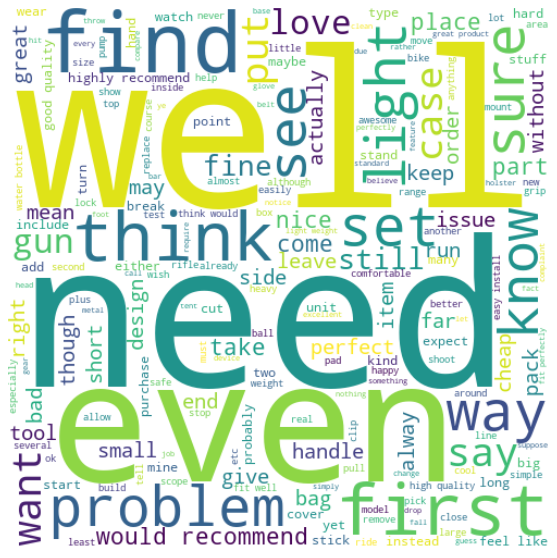

In [64]:
#generate a word cloud image 
import matplotlib.pyplot as plt
from wordcloud import WordCloud

fig = plt.figure(figsize=(10, 10))
wordcloud = WordCloud(width=500, height=500, background_color ="white").generate(str(clean_reviews))


plt.imshow(wordcloud, interpolation='bilinear')
_ = plt.axis("off")

#Note, sometimes the cell needs to be run twice for the image to populate

We can see that a few top occurring words include "need", "problem", "work great", and "work well". Other than the word "problem", the top words are positive. Now, we will use our `clean_reviews` to analyze the words for each rating. 

### Word Count for `Overall` Ratings 

First, let's look at a distribution plot of our `overall` rating scores. We can use a `distplot` in the `seaborn` module which allows us to plot a histogram with a distribution line (Seaborn distplot, n.d.). 

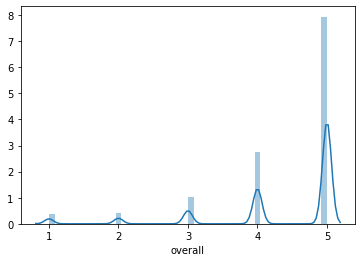

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.distplot(reviews_df['overall'])
    #(Python for nlp: Introduction to the textblob library, n.d.)

The graph above indicates that the majority of the reviews have been rated a 4 or 5. We know this is accurate because we determined above that most of our reviews are positive reviews. To confirm the graph output, we can use the `value_counts()` function on our `overall` column. 

In [66]:
reviews_df['overall'].value_counts()

5    188208
4     64809
3     24071
2     10204
1      9045
Name: overall, dtype: int64

Before we tokenize our text, we need to be able to get the reviews for a particular rating. We can do this by converting our `clean_reviews` to a NumPy array. Then we can use `NLTK` to tokenize the text and apply the `FreqDist` function. Once the `FreqDist` function has been used, we can use the `most_common()` function to get the most frequent words in each rating. 

In [67]:
import numpy as np
#get 'review_text' for overall rating of 5
overall_5 = np.array(clean_reviews)[reviews_df['overall']==5]

In [68]:
len(overall_5)

188208

In [69]:
wordcount5 = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(overall_5)))

In [70]:
wordcount5.most_common(15)

[('great', 72634),
 ('well', 69644),
 ('good', 63050),
 ('like', 56394),
 ('buy', 50076),
 ('would', 49035),
 ('knife', 45505),
 ('fit', 41957),
 ('easy', 38261),
 ('need', 38063),
 ('product', 30460),
 ('light', 29480),
 ('price', 29390),
 ('little', 29218),
 ('also', 29173)]

In [71]:
overall_1 = np.array(clean_reviews)[reviews_df['overall']==1]
wordcount1 = nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(overall_1)))
wordcount1.most_common(15)

[('would', 4436),
 ('buy', 3696),
 ('like', 2692),
 ('product', 2632),
 ('well', 2485),
 ('good', 2246),
 ('even', 2112),
 ('fit', 1830),
 ('first', 1599),
 ('return', 1593),
 ('take', 1523),
 ('money', 1512),
 ('way', 1511),
 ('come', 1510),
 ('say', 1398)]

Now that we know how to access the reviews in each review, we can loop through all the reviews and apply the same steps shown above. 

In [72]:
ratings = []

for i in range(1,6):
    ratings.append(nltk.FreqDist(nltk.tokenize.word_tokenize(' '.join(np.array(clean_reviews)[reviews_df['overall'] == i]))))

In [76]:
print('There are {} ratings in our dataset.'.format(len(ratings)), '\n')

print('There are {} words in our reviews that recieved a "1" rating.'.format(len(ratings[0])), '\n')
print('There are {} words in our reviews that recieved a "2" rating.'.format(len(ratings[1])), '\n')
print('There are {} words in our reviews that recieved a "3" rating.'.format(len(ratings[2])), '\n')
print('There are {} words in our reviews that recieved a "4" rating.'.format(len(ratings[3])), '\n')
print('There are {} words in our reviews that recieved a "5" rating.'.format(len(ratings[4])), '\n')

There are 5 ratings in our dataset. 

There are 29448 words in our reviews that recieved a "1" rating. 

There are 32440 words in our reviews that recieved a "2" rating. 

There are 56769 words in our reviews that recieved a "3" rating. 

There are 111471 words in our reviews that recieved a "4" rating. 

There are 204040 words in our reviews that recieved a "5" rating. 



Now, we can loop through our `ratings` list and get the most frequent words for each rating. 

In [74]:
for i in range(0,5):
    print('Rating', i+1,'-', ratings[i].most_common(15), '\n')

Rating 1 - [('would', 4436), ('buy', 3696), ('like', 2692), ('product', 2632), ('well', 2485), ('good', 2246), ('even', 2112), ('fit', 1830), ('first', 1599), ('return', 1593), ('take', 1523), ('money', 1512), ('way', 1511), ('come', 1510), ('say', 1398)] 

Rating 2 - [('would', 5641), ('like', 3971), ('well', 3839), ('good', 3258), ('buy', 3138), ('knife', 2546), ('fit', 2340), ('product', 2175), ('even', 1969), ('think', 1845), ('light', 1782), ('take', 1776), ('come', 1754), ('also', 1750), ('small', 1711)] 

Rating 3 - [('would', 12669), ('well', 10127), ('good', 9594), ('like', 9563), ('buy', 6321), ('knife', 5962), ('fit', 5674), ('little', 5033), ('need', 5008), ('great', 4587), ('small', 4532), ('think', 4430), ('light', 4191), ('come', 4189), ('also', 4108)] 

Rating 4 - [('good', 30410), ('well', 29180), ('would', 28604), ('like', 26470), ('great', 19574), ('knife', 17564), ('fit', 16717), ('little', 16346), ('buy', 15736), ('need', 14963), ('easy', 12730), ('price', 12317), 

For this assignment, we performed sentiment analysis to quantify product reviews from Amazon, which contained product reviews for "Sports and Outdoors" products. To perform sentiment analysis, we used the `TextBlob` module. This module allowed us to use the `sentiment` and `sentiment_assessments` functions to calculate the polarity and subjectivity scores and determine the words that were used to calculate the polarity and subjectivity scores. From here, we used the Naive Bayes Classifier to classify our reviews. Finally, we found the most frequent words used for each rating (1-5) in our `overall` column. 

## Resources

Amazon review data. (n.d.). Retrieved June 21, 2020, from http://jmcauley.ucsd.edu/data/amazon/

API Reference—TextBlob. (n.d.). Retrieved June 21, 2020, from https://textblob.readthedocs.io/en/dev/api_reference.html

Create a pandas dataframe from lists. (2018, December 17). GeeksforGeeks. https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

George, N. (n.d.). Sentiment analysis. Dr. G. Retrieved June 21, 2020, from //nateGeorge.github.io/python-sentiment-analysis/

Get the first key in dictionary. (2019, August 8). GeeksforGeeks. https://www.geeksforgeeks.org/python-get-the-first-key-in-dictionary/

How to rotate axis labels in seaborn and matplotlib. (n.d.). Drawing from Data. Retrieved June 21, 2020, from https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib

Jain, S. (2018, February 11). Natural Language Processing for Beginners: Using TextBlob. https://www.analyticsvidhya.com/blog/2018/02/natural-language-processing-for-beginners-using-textblob/

Matplotlib. Pyplot. Bar. (n.d.). Retrieved June 21, 2020, from https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.bar.html

Python for nlp: Introduction to the textblob library. (n.d.). Stack Abuse. Retrieved June 21, 2020, from https://stackabuse.com/python-for-nlp-introduction-to-the-textblob-library/

Read_json. (n.d.). Retrieved June 21, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

Seaborn Countplot. (n.d.). Retrieved June 21, 2020, from https://seaborn.pydata.org/generated/seaborn.countplot.html

Seaborn distplot. (n.d.). Retrieved June 21, 2020, from https://pythonbasics.org/seaborn-distplot/

Sort_values. (n.d.). Retrieved June 21, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

Textblob: Anaconda cloud. (n.d.). Retrieved June 21, 2020, from https://anaconda.org/conda-forge/textblob

Thompson, A. (2018, January 15). Sentiment analysis for social good? Medium. https://medium.com/@BrotherAustin/sentiment-analysis-for-social-good-b13fef52b3d3

To_datetime. (n.d.). Retrieved June 21, 2020, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

Twitter sentiment analysis using python. (2017, January 24). GeeksforGeeks. https://www.geeksforgeeks.org/twitter-sentiment-analysis-using-python/

Vaish, R. (2018, June 14). Textblob and sentiment analysis—Python. Medium. https://medium.com/@rahulvaish/textblob-and-sentiment-analysis-python-a687e9fabe96

Value_count()s. (2018, December 24). GeeksforGeeks. https://www.geeksforgeeks.org/python-pandas-index-value_counts/

World Class From the Expert: Week 7